# Audio Analysis Library for Brain Battle

This module is used to analyse the audio from the videos uploaded, and find the time differences between these videos so that they can be synchronized with ease.

We use Scipy's correlate() method to compare two audios extracted from the videos, and then find the delay of the second video.

In [33]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import moviepy.editor as editor

In [34]:
# Load video1
video1 = editor.VideoFileClip("00002.MTS")

# Extract audio as a numpy array from the video.
audio1_samples = list(video1.audio.iter_frames())
audio1 = np.array(audio1_samples).T

# Reduce two-channel stereo audio into single-channel mono
# By adding two channels together and dividing by 2. 
final_audio1 = (audio1[0] + audio1[1]) / 2.0


In [35]:
# Load video2
video2 = editor.VideoFileClip("P1030253.MP4")

# Extract audio as a numpy array from the video.
audio2_samples = list(video2.audio.iter_frames())
audio2 = np.array(audio2_samples).T

# Reduce two-channel stereo audio into single-channel mono
# By adding two channels together and dividing by 2.
final_audio2 = (audio2[0] + audio2[1]) / 2.0

In [36]:
# Trying to use SCIPY to correlate two audio files with each other.

from scipy import signal

# The method paramater does not matter much here.
# fft is faster than the default.
corr = signal.correlate(final_audio1, final_audio2, mode="same", method="fft")

# correlation_lags method creates an array
# that contains the possible delays according to each correlation
# Its kind of like dark magic ngl.
lags = signal.correlation_lags(len(final_audio1), len(final_audio2), mode="same")

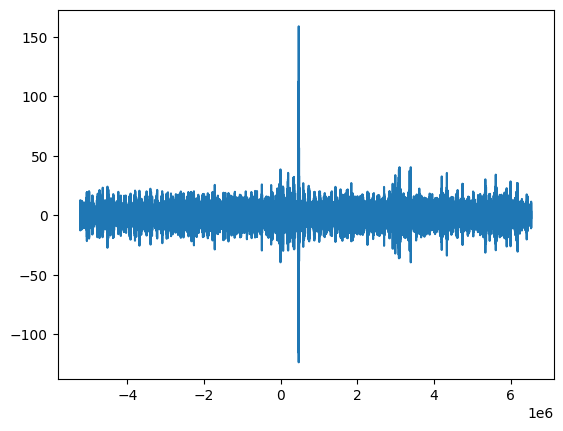

In [37]:
# Plot the cross-correlation against the delays (delays are in terms of samples per second.)
plt.plot(lags, corr)
plt.show()

In [38]:
# The maximum correlation happens at the amount the second video is delayed compared to the first.
max_corr = np.argmax(corr)
print(max_corr)

# We divide the lag by the samples per second (44100 for a normal WAV file)
# to find the amount "the second video" is delayed compared to the first.
# Essentially convert the number from samples into seconds.
time_delay = lags[max_corr] / 44100

print(f"The amount of seconds the 2nd video is delayed is: {time_delay} sec")


5702752
The amount of seconds the 2nd video is delayed is: 10.694126984126983 sec


Next

https://stackoverflow.com/questions/33383650/using-cross-correlation-to-detect-an-audio-signal-within-another-signal

cross correlation to find where audio matches.